# EDA And Preprocessing

In [11]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
train_txt_raw=open('data/us_train.text','r',encoding='utf-8')
train_txt_labels=open('data/us_train.labels','r',encoding='utf-8')

train_txt=[]
train_labels=[]


for sentence in train_txt_raw:
    sentence=sentence.rstrip()
    train_txt.append(sentence)

for sentence in train_txt_labels:
    sentence=sentence.rstrip()
    train_labels.append(sentence)

In [13]:
df=pd.DataFrame()
df['tweet']=train_txt
df['labels']=train_labels

In [14]:
df

,tweet,labels
0,A little throwback with my favourite person @ ...,0
1,glam on @user yesterday for #kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2
...,...,...
49995,My #O2otd Love this chain so much and our new ...,1
49996,Met Santa and Olaf @ the North Pole today @ No...,0
49997,New York by Night Strideby #HERElocationNYC......,11
49998,Kisses for the birthday girl! @ Helzberg Diamonds,0


In [15]:
emoji_raw=open('data/us_mapping.txt','r',encoding='utf-8')

In [16]:
emojis=[]
for sentence in emoji_raw:
    print(sentence)
    sentence = sentence.rstrip()
    emojis.append(sentence)

0	❤️	 Red heart	

1	😍	 Smiling face with hearteyes	

2	😂	 Face with tears of joy	

3	💕	 Two hearts

4	🔥	 Fire

5	😊	 Smiling face with smiling eyes	

6	😎	 Smiling face with sunglasses	

7	✨	 Sparkles 	

8	💙	 Blue heart

9	😘	 Face blowing a kiss	

10	📷	 Camera	

11	🇺🇸	 United States	

12	☀️	 Sun

13	💜	 Purple heart 	

14	😉	 Winking face	

15	💯	 Hundred points	

16	😁	 Beaming face with smiling eyes	

17	🎄	Christmas tree	

18	📸	Camera with flash

19	😜	Winking face with tongue	



In [17]:
emos=[]
mapp=[]
desc=[]


for e in emojis:
    emos.append(e.split()[1])
    mapp.append(e.split()[0])
    desc.append(' '.join(e.split()[2:]))

df_em=pd.DataFrame({'labels':mapp})
df_em['emoji']=emos
df_em['Description']=desc

In [18]:
df_em

,labels,emoji,Description
0,0,❤️,Red heart
1,1,😍,Smiling face with hearteyes
2,2,😂,Face with tears of joy
3,3,💕,Two hearts
4,4,🔥,Fire
5,5,😊,Smiling face with smiling eyes
6,6,😎,Smiling face with sunglasses
7,7,✨,Sparkles
8,8,💙,Blue heart
9,9,😘,Face blowing a kiss


In [19]:
df_em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   labels       20 non-null     object
 1   emoji        20 non-null     object
 2   Description  20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


C:\Users\HP\AppData\Local\Temp\ipykernel_14316\395785976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['labels'], palette="plasma")


<Axes: xlabel='labels', ylabel='count'>

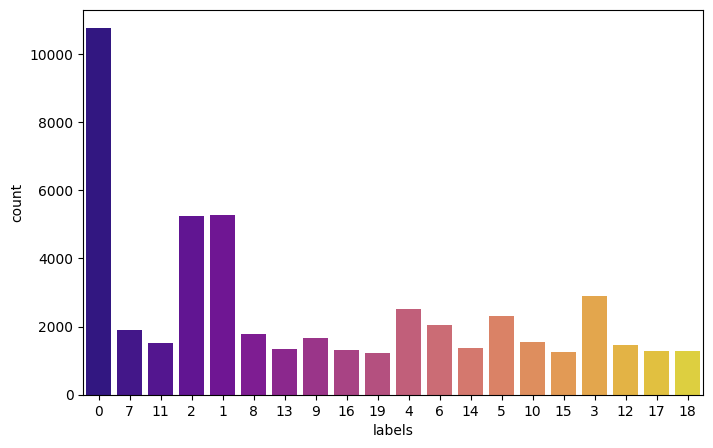

In [20]:
plt.figure(figsize=(8,5))

sns.countplot(x=df['labels'], palette="plasma")

In [23]:
df.to_csv('unclean_twitterdata.csv')

To clean the tweets within the unclean dataset

In [30]:
df=pd.read_csv('unclean_twitterdata.csv')

df.drop(columns=['Unnamed: 0'],axis=1)
df

,Unnamed: 0,tweet,labels
0,0,A little throwback with my favourite person @ ...,0
1,1,glam on @user yesterday for #kcon makeup using...,7
2,2,Democracy Plaza in the wake of a stunning outc...,11
3,3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,4,Who never... @ A Galaxy Far Far Away,2
...,...,...,...
49995,49995,My #O2otd Love this chain so much and our new ...,1
49996,49996,Met Santa and Olaf @ the North Pole today @ No...,0
49997,49997,New York by Night Strideby #HERElocationNYC......,11
49998,49998,Kisses for the birthday girl! @ Helzberg Diamonds,0


In [32]:
df['tweet']

0        A little throwback with my favourite person @ ...
1        glam on @user yesterday for #kcon makeup using...
2        Democracy Plaza in the wake of a stunning outc...
3         Then &amp; Now. VILO @ Walt Disney Magic Kingdom
4                     Who never... @ A Galaxy Far Far Away
                               ...                        
49995    My #O2otd Love this chain so much and our new ...
49996    Met Santa and Olaf @ the North Pole today @ No...
49997    New York by Night Strideby #HERElocationNYC......
49998    Kisses for the birthday girl! @ Helzberg Diamonds
49999    Dinner with this priceless view!Thank you, S #...
Name: tweet, Length: 50000, dtype: object

In [34]:
import string
import re

def clean_tweet(tweet):
    tweet = str(tweet).lower()
    rm_mention = re.sub(r'@[A-Za-z0-9]+', '', tweet)                    
    rm_rt = re.sub(r'RT[/s]+', '', rm_mention)                   
    rm_links = re.sub(r'http\S+', '', rm_rt)                             
    rm_links = re.sub(r'https?:\/\/\S+','', rm_links)
    rm_nums = re.sub('[0-9]+', '', rm_links)                          
    rm_punc = [char for char in rm_nums if char not in string.punctuation] 
    rm_punc = ''.join(rm_punc)
    cleaned = rm_punc
    
    return cleaned


In [40]:
tweet=df['tweet'][2]
tweet

cleaned=clean_tweet(tweet)
cleaned

'democracy plaza in the wake of a stunning outcome decision  nbc news'

In [44]:
df['tweet']=df['tweet'].apply(clean_tweet)
df['tweet'][2]

'democracy plaza in the wake of a stunning outcome decision  nbc news'

In [45]:
df.to_csv('emoji_cleaned.csv')

In [46]:
df

,Unnamed: 0,tweet,labels
0,0,a little throwback with my favourite person w...,0
1,1,glam on yesterday for kcon makeup using in f...,7
2,2,democracy plaza in the wake of a stunning outc...,11
3,3,then amp now vilo walt disney magic kingdom,0
4,4,who never a galaxy far far away,2
...,...,...,...
49995,49995,my ootd love this chain so much and our new ri...,1
49996,49996,met santa and olaf the north pole today nort...,0
49997,49997,new york by night strideby herelocationnyc see...,11
49998,49998,kisses for the birthday girl helzberg diamonds,0


Preprocessing the current dataset

In [53]:
import nltk
import spacy
from nltk.stem import WordNetLemmatizer

nlp=spacy.load('en_core_web_sm')
lemmatizer=WordNetLemmatizer()

def tweet_preprocessing(tweet,nlp=nlp,lemmatizer=lemmatizer):
    stop_words=nlp.Defaults.stop_words
    rm_stop_words_lemma=[]
    doc=nlp(tweet)

    for token in doc:
        if token.text not in stop_words and token.pos_!='PUNCT':
            lemma_word=lemmatizer.lemmatize(token.text)
            rm_stop_words_lemma.append(lemma_word)
    processed=' '.join(rm_stop_words_lemma)

    return processed

In [55]:
tweet=df['tweet'][52]
cleaned=clean_tweet(tweet)

tweet_preprocessing(cleaned)

'making stride   jones beach boardwalk'

In [57]:
df['tweet']=df['tweet'].apply(tweet_preprocessing)

In [ ]:
df.to_csv('stp_lm.csv')

In [59]:
stemmed_Data=pd.read_csv('stp_lm.csv')
stemmed_Data

,Tweet,Label
0,little throwback favourite person water wall,0
1,glam yesterday kcon makeup featherette,7
2,democracy plaza wake stunning outcome decision...,11
3,amp vilo walt disney magic kingdom,0
4,galaxy far far away,2
...,...,...
49995,ootd love chain new ring putaringonit odesigne...,1
49996,met santa olaf north pole today north pole...,0
49997,new york night strideby herelocationnyc seemyc...,11
49998,kiss birthday girl helzberg diamond,0


# Emoji Prediction using Deep Learning

####     

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras

In [ ]:
df = pd.read_csv("data/stp_lm.csv")
df.dropna(inplace=True)

In [ ]:
df.head(10)

,Tweet,Label
0,little throwback favourite person water wall,0
1,glam yesterday kcon makeup featherette,7
2,democracy plaza wake stunning outcome decision...,11
3,amp vilo walt disney magic kingdom,0
4,galaxy far far away,2
5,dinner fla tonight panseared salmon couscous...,1
6,fav senior game congrats beating west west s...,8
7,got formal best friend phi mu jsu,0
8,cause miss little homies throwback cousinlove ...,13
9,birthday kiss madison wisconsin,9


### Over-sampling data

In [ ]:
X = df["Tweet"].values
y = df["Label"].values

In [ ]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X = X.reshape(-1,1)
X, y = os.fit_sample(X, y)

In [ ]:
X = X.reshape(-1,)
X.shape

(49985,)

#   

### Tokenization

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=80000)
tokenizer.fit_on_texts(X)

In [ ]:
print("Text \n",X[:10],'\n')

X_seqs = tokenizer.texts_to_sequences(X)
print("Sequences")
X_seqs[:10]

Text 
 ['little throwback favourite person   water wall'
 'glam   yesterday kcon makeup   featherette'
 'democracy plaza wake stunning outcome decision   nbc news'
 'amp vilo   walt disney magic kingdom' '  galaxy far far away'
 'dinner fla tonight   panseared salmon couscous veggie salad yum dinner florida salmon'
 'fav senior game congrats beating west   west salem'
 'got formal best friend   phi mu jsu'
 'cause miss little homies throwback cousinlove   indiana university'
 'birthday kiss   madison wisconsin'] 

Sequences


[[25, 310, 1605, 288, 474, 622],
 [2748, 194, 15729, 526, 15730],
 [5764, 623, 898, 974, 7993, 2906, 4598, 1205],
 [6, 15731, 372, 57, 149, 228],
 [2225, 639, 639, 409],
 [106, 4599, 40, 15732, 2140, 15733, 3118, 1301, 1206, 106, 51, 2140],
 [373, 321, 94, 374, 6679, 127, 127, 2335],
 [16, 870, 13, 17, 788, 2907, 7994],
 [380, 65, 25, 1562, 310, 4167, 402, 21],
 [22, 624, 496, 687]]

In [ ]:
idx2words = tokenizer.index_word

print("Word Mappings\n")
for i in range(1,10):
    print("Index: ",i, "---->",idx2words[i])

Word Mappings

Index:  1 ----> love
Index:  2 ----> new
Index:  3 ----> day
Index:  4 ----> nt
Index:  5 ----> happy
Index:  6 ----> amp
Index:  7 ----> m
Index:  8 ----> time
Index:  9 ----> night


In [ ]:
vocab_size = len(tokenizer.index_word)
print("Vocabulary size :",len(tokenizer.index_word))

Vocabulary size : 54697


In [ ]:
from keras.preprocessing.sequence import pad_sequences

max_len=40
X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)

In [ ]:
print("Before Padding")
print(X_seqs[:1])

print("\nAfter Padding")
print(X_seqs_pd[:1])

Before Padding
[[25, 310, 1605, 288, 474, 622]]

After Padding
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   25  310 1605  288  474  622]]


### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X_seqs_pd, y, test_size=0.3, random_state=105)
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

print("Test X Dim ",X_test.shape)
print("Test y Dim ",y_test.shape)

Training X Dim  (150626, 40)
Training y Dim  (150626, 20)
Test X Dim  (64554, 40)
Test y Dim  (64554, 20)


## Deep Learning  Model using Bidirectional-LSTMs

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = vocab_size
seq_len = 40
embed_len=128


model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 128)           8022016   
_________________________________________________________________
bidirectional (Bidirectional (None, 40, 160)           133760    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40, 160)           154240    
_________________________________________________________________
global_max_pooling1d (Global (None, 160)               0         
_________________________________________________________________
dropout (Dropout)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                10304     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=0,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [ ]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
batch_size=64
epochs = 15

model.fit(X_train, y_train, batch_size=batch_size, epochs = epochs, 
          shuffle=True,validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/15
2354/2354 [==============================] - 224s 95ms/step - loss: 2.2879 - accuracy: 0.2940 - val_loss: 1.4041 - val_accuracy: 0.5763
Epoch 2/15
2354/2354 [==============================] - 223s 95ms/step - loss: 1.0589 - accuracy: 0.6898 - val_loss: 0.8214 - val_accuracy: 0.7561
Epoch 3/15
2354/2354 [==============================] - 223s 95ms/step - loss: 0.6128 - accuracy: 0.8237 - val_loss: 0.6235 - val_accuracy: 0.8254
Epoch 4/15
2354/2354 [==============================] - 223s 95ms/step - loss: 0.4133 - accuracy: 0.8837 - val_loss: 0.5428 - val_accuracy: 0.8616
Epoch 5/15
2354/2354 [==============================] - 222s 94ms/step - loss: 0.3023 - accuracy: 0.9167 - val_loss: 0.4961 - val_accuracy: 0.8795
Epoch 6/15
2354/2354 [==============================] - 222s 94ms/step - loss: 0.2319 - accuracy: 0.9374 - val_loss: 0.5038 - val_accuracy: 0.8874
Epoch 00006: early stopping


KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test, y_test, batch_size=batch_size)

1009/1009 [==============================] - 7s 7ms/step - loss: 0.5038 - accuracy: 0.8874


[0.5403534173965454, 0.8935310244560242]

In [ ]:
loss = pd.DataFrame(model.history.history)
loss

,loss,accuracy,val_loss,val_accuracy
0,2.2879,0.2940,1.4041,0.5763
1,1.0589,0.6898,0.8214,0.7561
2,0.6128,0.8237,0.6235,0.8254
3,0.4133,0.8837,0.5428,0.8616
4,0.3023,0.9167,0.4961,0.8795
5,0.2319,0.9374,0.5038,0.8874


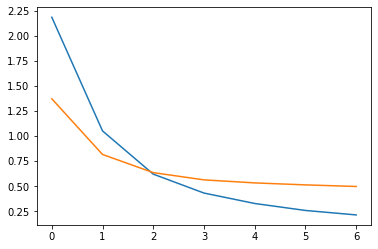

In [ ]:
plt.plot(loss[["loss","val_loss"]])
plt.show()

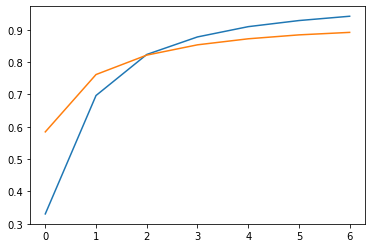

In [ ]:
plt.plot(loss[["accuracy","val_accuracy"]])

## Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


predictions = model.predict_classes(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.56      0.31      0.40      3211
           1       0.69      0.64      0.66      3249
           2       0.84      0.73      0.78      3240
           3       0.79      0.85      0.82      3175
           4       0.93      0.93      0.93      3208
           5       0.82      0.88      0.85      3281
           6       0.89      0.93      0.91      3255
           7       0.87      0.94      0.90      3172
           8       0.93      0.93      0.93      3273
           9       0.84      0.94      0.89      3226
          10       0.96      0.89      0.92      3202
          11       0.93      0.98      0.95      3216
          12       0.95      0.97      0.96      3277
          13       0.95      0.97      0.96      3202
          14       0.95      0.97      0.96      3225
          15       0.95      0.98      0.97      3177
          16       0.94      0.96      0.95      3234
          17       0.97    

In [ ]:
model.save("BLSTM.h5")

#  

# Results

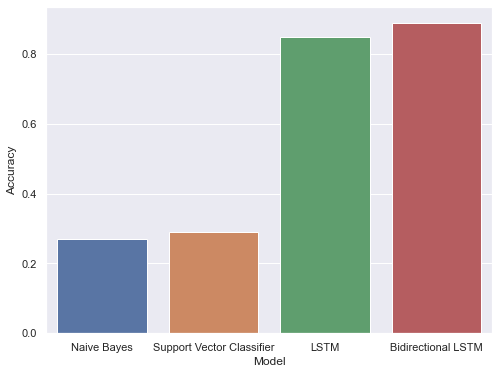

In [ ]:
accuracy=[0.27,0.29,0.85,0.89]
labels=['Naive Bayes','Support Vector Classifier','LSTM','Bidirectional LSTM']


sns.set(rc={'figure.figsize':(8,6)})
ax = sns.barplot(x=labels, y=accuracy)
ax.set(xlabel='Model', ylabel='Accuracy')
plt.show()

## Emoji Prediction on Tweets

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tensorflow.keras

In [ ]:
df = pd.read_csv("data/emoji_uncleaned.csv").sample(n=30)
df.dropna(inplace=True)

X = df["Tweet"].values
y = df["Label"].values

In [ ]:
emoji_raw = open('data/us_mapping.txt','r',encoding="utf8")

emojis=[]
for sentence in emoji_raw:
    sentence = sentence.rstrip()
    emojis.append(sentence)

    
emoji_dict={}

for e in emojis:
    idx = int(e.split()[0])
    emoji = e.split()[1]
    emoji_dict[idx] = emoji

In [ ]:
from keras.preprocessing.sequence import pad_sequences

tokenizer = pickle.load(open("Model/tweet_tokenizer",'rb'))

def preprocess_text(X):
    max_len=40
    X_seqs = tokenizer.texts_to_sequences(X)
    X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)
    return X_seqs_pd

In [ ]:
from tensorflow import keras

model = keras.models.load_model("Model/BLSTM.h5", compile=False)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 128)           8022016   
                                                                 
 bidirectional (Bidirection  (None, 40, 160)           133760    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 40, 160)           154240    
 onal)                                                           
                                                                 
 global_max_pooling1d (Glob  (None, 160)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                        

In [ ]:
X_sequences = preprocess_text(X)
predictions = np.argmax(model.predict(X_sequences), axis=1)

y_map = [emoji_dict[idx] for idx in y]
predictions = [emoji_dict[idx] for idx in predictions]

results = pd.DataFrame({"Tweet":X})
results["True"] = y_map
results["Predicted"] = predictions

results

1/1 [==============================] - 5s 5s/step


,Tweet,True,Predicted
0,"@ Bank Head, ATL",💯,💯
1,Thirsty? I vote for @user #5WeThePluggAllMy @ ...,💯,😎
2,After a long weekend of school work #supersoni...,😊,😊
3,"Off to Greensboro. (@ Lexington, NC - @user in...",😉,😉
4,F$&amp;k yeah!!! #jenga #colleaguelove #holida...,😎,😎
5,The atmosphere here is crazy #EastRiverDerby #...,🔥,🔥
6,#ChineseNewYear! Wishing you prosperity and go...,❤️,❤️
7,Styled by @user pic by envoyphotography set up...,🔥,🔥
8,The Happiest Place on Earth @ Sleeping Beauty ...,✨,✨
9,Nut gang @ Fuji Steakhouse TN,🔥,🔥


In [ ]:
import string
import re

from tensorflow import keras
emoji_predict_model = keras.models.load_model("Model/BLSTM.h5", compile=False)


def tweet_clean(tweet):
    tweet = str(tweet).lower()
    rm_mention = re.sub(r'@[A-Za-z0-9]+', '', tweet)                       # remove @mentions
    rm_rt = re.sub(r'RT[/s]+', '', rm_mention)                             # remove RT
    rm_links = re.sub(r'http\S+', '', rm_rt)                               # remove hyperlinks
    rm_links = re.sub(r'https?:\/\/\S+','', rm_links)
    rm_nums = re.sub('[0-9]+', '', rm_links)                               # remove numbers
    rm_punc = [char for char in rm_nums if char not in string.punctuation] # remove punctuations
    rm_punc = ''.join(rm_punc)
    cleaned = rm_punc
    
    return cleaned


def predict_emoji(text, model=emoji_predict_model):
    text = tweet_clean(text)
    X_sequences = preprocess_text([text])
    predictions = np.argmax(model.predict(X_sequences), axis=1)
    emoji_idx = predictions[0]
    emoji = emoji_dict[emoji_idx]
    
    return emoji

In [ ]:
text = input("Enter tweet \n\n")

print("\n\n Most likely emoji of the tweet \n\n")
print(text+" "+predict_emoji(text))



 Most likely emoji of the tweet 


1/1 [==============================] - 0s 55ms/step
dude I AM SO IN LOVE WITH YOU @ Good Karma 😘


In [ ]:
text = input("Enter tweet \n\n")

print("\n\n Most leikely emojin of the Tweet \n\n")
print(text+" "+predict_emoji(text))



 Most leikely emojin of the Tweet 


1/1 [==============================] - 0s 69ms/step
funny 😂


In [ ]:
text = input("Enter tweet \n\n")

print("\n\n most like emojy for this tweet \n\n")
print(text+" "+predict_emoji(text))



 most like emojy for this tweet 


1/1 [==============================] - 0s 59ms/step
food 😍


In [ ]:
text = input("Enter tweet \n\n")

print("\n\n Most likely emoji of this tweet \n\n")
print(text+" "+predict_emoji(text))



 Most likely emoji of this tweet 


1/1 [==============================] - 0s 60ms/step
lets hope the wildfires ceases 🔥


In [ ]:
text = input("Enter tweet \n\n")

print("\n\n Most likely emoji of this tweet \n\n")
print(text+" "+predict_emoji(text))



 Most likely emoji of this tweet 


1/1 [==============================] - 0s 54ms/step
This is so funny i couldnt stop laughing 😂
